### Big file MC

In [ ]:
# signal mc; w/t-slope; all plugins
fileNameALLPLUGINS = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test1/root/trees/flatten/tree_pipkslamb_sp-fa18_B4M16M18_genamp2_FSflat_ALLPLUGINS.root'
treeName = 'ntFSGlueX_100000000_1100'

# signal mc; w/t-slope; only REACTION_FILTER plugin
fileNameRXNPLUGINONLY = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/trees/flatten/tree_pipkslamb__sp-fa18_B4_M16_M18_gen_amp_V2_FSflat_REACTIONFILTER-ONLY.root'

# SIGNAL MC WITH t-slope
fileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_signal_man-t/root/trees/flatten/tree_pipkslamb__B4_M16_M18_gen_amp_V2_FSflat_Spr-Fa2018.root'
# metaData = '10,000,000 events.  Fall 2018 All.  Genamp2. FS flat. t-slope: 1.3'

# SIGNAL MC
# fileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_signal/root/trees/flatten/tree_pipkslamb__B4_M16_M18_gen_amp_V2_FSflat_Spr-Fa18.root'
# metaData = '10,000,000 events.  Fall 2018 All.  Genamp2. FS flat.'

# PHASE SPACE MC
# fileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018/root/trees/flatten/tree_pipkslamb__B4_M16_M18_genamp2_fall2018_FSflat.root'
# metaData = '10,000,000 events.  Fall 2018 All.  Genamp2. FS flat. phase space (no resonances)'

treeName = 'ntFSGlueX_100000000_1100'

### Little file MC

In [ ]:
# fileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018/root/trees/flatten/tree_pipkslamb__B4_M16_M18_genamp2_fall2018_FSflat_small.root'
# fileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/spring2018_SBT_test2/root/trees/tree_pipkslamb__B4_M16_M18ec_gen_amp_V2_040856_FSFlat.root'
# fileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/spring2018_SBT_test3/root/trees/flatten/tree_pipkslamb__B4_M16_M18ec_gen_amp_V2_042239_FSFlat_TEST.root'

######## MEDIUM SIZE FILE ########
fileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/trees/flatten/tree_pipkslamb__B4_M16_M18_gen_amp_V2_FSflat_500runs.root'

treeName = 'ntFSGlueX_100000000_1100'

### BGGEN (Big file)

In [ ]:
fileName = '/volatile/halld/home/dbarton/pipkslamb/mc/bggen/fall2018/flatten/tree_pipkslamb__BGGEN_FSflat.root'
treeName = 'ntFSGlueX_100000000_1100'

### Startup MC

In [14]:
######## Usage: start container in terminal --> open kernel "existing jupyter server" in this jupyter notebook --> run code below.
######## Documentation: https://lan13005.github.io/PyAmpTools/intro.html#apptainer-usage

import ROOT
from pyamptools import atiSetup
import os
os.chdir("/work/halld/home/dbarton/gluex/KShortPipLambda_MC")
# os.chdir("/volatile/halld/home/dbarton/pipkslamb/mc/bggen/fall2018/flatten/")
os.listdir()
atiSetup.setup(globals(), use_fsroot=True)

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# DEFINE VARIABLES CORRESPOONDING TO THE INDICES
DecayingLambda = "1"
Proton = "1a"
PiMinus2 = "1b"
DecayingKShort = "2"
PiPlus2 = "2a"
PiMinus1 = "2b"
PiPlus1 = "3"
NegOne = "-1.*"

# OTHER VARIABLES
mand_t = f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})"

# CUTS
ROOT.FSCut.defineCut("flightSigLambda","VeeLP1>5.0")
ROOT.FSCut.defineCut("flightSigKShort","VeeLP2>5.0") 
ROOT.FSCut.defineCut("chi2DOF","Chi2DOF","0.0","3.0")
ROOT.FSCut.defineCut("unusedE","EnUnusedSh","0.0","0.1") # UnusedEnergy (unused "shower"? energy)
ROOT.FSCut.defineCut("unusedTracks","NumUnusedTracks<1") # No unused tracks
ROOT.FSCut.defineCut("coherentPeak","EnPB","8.2","8.8") # Coherent peak: 8.2 < E_beam < 8.8
ROOT.FSCut.defineCut("constrainLambda",f"MASS({Proton},{PiMinus2})","1.1","1.132", "1.08", "1.1", "1.132", "1.22")
ROOT.FSCut.defineCut("constrainKShort",f"MASS({DecayingKShort})","0.49","0.51", "0.0", "0.49", "0.51", "1.0")
ROOT.FSCut.defineCut("constrainKSTAR",f"MASS({DecayingKShort},{PiPlus1})","0.85","0.95", "0.0", "0.85", "0.95", "1.0")

# Other cuts
ROOT.FSCut.defineCut("targetZ","ZVertex","-10.0","10.0") # Target Z
ROOT.FSCut.defineCut("missingMass2Lambda","MM2Lambda","-0.1","0.1") # MissingMass2 for Lambda

def gluex_style():
    style = ROOT.TStyle("GlueX", "Default GlueX Style")

    style.SetCanvasBorderMode(0)
    style.SetPadBorderMode(0)
    style.SetPadColor(0)
    style.SetCanvasColor(0)
    style.SetTitleColor(0)
    style.SetStatColor(0)

    style.SetCanvasDefW(800)
    style.SetCanvasDefH(600)

    style.SetPadBottomMargin(0.15)
    style.SetPadLeftMargin(0.15)
    style.SetPadTopMargin(0.05)
    style.SetPadRightMargin(0.08)

    style.SetStripDecimals(0)
    style.SetLabelSize(0.055, "xyz")
    style.SetTitleSize(0.06, "xyz")
    style.SetTitleFont(42, "xyz")
    style.SetLabelFont(42, "xyz")
    style.SetTitleOffset(1.2, "y")
    style.SetLabelOffset(0.01, "xyz")

    style.SetOptStat(0)
    style.SetOptTitle(0)
    style.SetHistLineWidth(2)
    style.SetHistFillColor(920)  # grey

    # style.SetPadGridX(1)
    # style.SetPadGridY(1)

    style.SetPalette(ROOT.kViridis)

    style.cd()

atiSetup| jupyter-lab called python3.9

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| Saved aliases found in /app/PyAmpTools/src/pyamptools/.aliases.txt, attempting to load...
atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URConfig - doesn't exist un

### List branches

In [ ]:
def list_trees_and_branches(fileName):
    file = ROOT.TFile.Open(fileName)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"Tree Name: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()

list_trees_and_branches(fileName)


## Mand t MC

### Mandelstam t MC

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Momentum transfer'
axisLabel = '-(p_{p} - p_{\Lambda})^{2} [GeV^{2}]'
# axisLabel = '-t [GeV^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})", "(80, 0.0, 2.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort)")
    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, mand_t, "(80, 0.0, 2.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort)")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events (log)')
    h1.GetYaxis().SetRangeUser(1.,10E+04)
    h1.Draw()

    exp = ROOT.TF1("exp","expo(3)",0.0,2.0) # functionLabel, function, x_min, x_max
    # exp.SetParName(3, "exp_offset")
    # exp.SetParName(4, "exp_decay")
    exp.SetParameter(3, 6.66)
    exp.SetParameter(4, -1.30)
    exp.SetLineColor(ROOT.kRed)
    exp.SetLineWidth(2)
    exp.SetLineStyle(2)
    exp.Draw('same')
    
    legend1 = ROOT.TLegend(0.55, 0.80, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1,'mand_t (cuts:Ks-LambFlightSig)', 'l')
    legend1.AddEntry(exp,'Plot: exp^{#alpha #times t} (not a fit)', 'l')
    legend1.Draw('same')

    img_path = 'plotsMC/MC_mand-t'
    canvas.SetLogy()
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    # print value for parameter [3] of exp function:
    print(exp.GetParameter(3))
    print(exp.GetParameter(4))
    os.remove(img_path + '.png')

plot_hist()

## Other

### Beam energy MC

### Flight significance

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'BGGEN \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)



def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "VeeLP1", "(100, -5.0, 100.0)", "")
                                  
    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(80, 0.45, 0.55)", "CUT(flightSigKShort)&&MAXEVENTS==10000")


    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('')

    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' ks flightSig', 'l')

    legend1.Draw('same')

    img_path = 'plotsMC/VeeLP1'
    # canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    # os.remove(img_path + '.png')

plot_hist()

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s} \pi^{+})'

# [ AmplitudeManager ]:

#         Creating AmplitudeManager for the reaction:  KsPipLamb
#                  particle index assignment:  Beam -> 0
#                  particle index assignment:  Lambda -> 1
#                  particle index assignment:  Pi+ -> 2
#                  particle index assignment:  KShort -> 3


def plot_hist():

    # Clear cache when re-plotting/scaling/etc.
    ROOT.FSHistogram.clearHistogramCache()

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)


    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({2},{3})", "(100, 3.05, 11.5)", "CUT()")
    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "EnPB", "(100, 7.5, 9.5)", "CUT()")
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    # h1.Scale(100)

    # h2.SetTitle("")
    # h2.SetTitle(plotTitle)
    # h2.SetStats(False)
    # h2.SetLineColor(ROOT.kBlue)
    # # h2.SetLineStyle(7) # set line type to dashed
    # # h2.SetLineWidth(2)
    # h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    # h2.GetYaxis().SetTitle('Events')
    # # h2.Scale(2)

    # h3.SetTitle("")
    # h3.SetTitle(plotTitle)
    # h3.SetStats(False)
    # h3.SetLineColor(ROOT.kBlack)
    # h3.SetLineStyle(1)
    # h3.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    # h3.GetYaxis().SetTitle('Events')

    h1.Draw('hist')
    # h2.Draw('hist')
    # h3.Draw('hist')

    legend1 = ROOT.TLegend(0.65, 0.750, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'energy', 'l')
    # legend1.AddEntry(h2, 'initial cuts', 'l')
    # legend1.AddEntry(h3, 'initial, select #Lambda & K_{s}', 'l')
    legend1.Draw('same')

    img_path = 'plotsMC/energyBeam_m'
    # img_path = 'KShortPipLambda_MC/plotsMC/KsPip_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF - 2D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, "Chi2DOF:Event", "(60,0.0,155000000.0,60,0.0,10.0)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    # h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plotsMC/Chi2DOF-Event'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF 1D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "chi2DOF", "(80,0.0,10.0)", "CUT()")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plotsMC/Chi2DOF'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

# Mass plots

## K* MC

### K* CUTS

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Signal MC: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (\pi^{+} \pi^{-} \pi^{+})'

# INDICES ASSIGNED BY 'flatten' (use these ones):
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.3, 3.2)", "CUT()")
    # h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.3, 3.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    # h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda)")
    h4 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
    # hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
    # Tighter mass window (100, ?, ?)
    
    # h1.SetStats(False)
    # h1.SetMarkerColor(ROOT.kMagenta)
    # h1.SetMarkerStyle(4)
    # h1.SetMarkerSize(0.8)
    # h1.SetLineColor(ROOT.kMagenta)
    # h1.SetLineStyle(1)
    # h1.SetLineWidth(1)
    # h1.SetFillColor(ROOT.kMagenta)
    # h1.SetFillStyle(3002)
    # h1.GetXaxis().SetTitle(axisLabel)
    # h1.Draw('pl, hist')

    # h2.SetStats(False)
    # h2.SetLineColor(ROOT.kBlue)
    # h2.SetLineStyle(8)
    # h2.SetLineWidth(2)
    # h2.SetFillColor(ROOT.kBlue)
    # h2.SetFillStyle(3002)
    # h2.GetXaxis().SetTitle(axisLabel)
    # h2.Draw('same, hist')

    # h3.SetStats(False)
    # h3.SetMarkerColor(ROOT.kBlack)
    # h3.SetMarkerStyle(4)
    # h3.SetMarkerSize(0.8)
    # h3.SetLineColor(ROOT.kBlack)
    # h3.SetLineStyle(1)
    # h3.SetLineWidth(2)
    # h3.SetFillColor(920)
    # h3.SetFillStyle(302)
    # h3.GetXaxis().SetTitle(axisLabel)
    # h3.Draw("same,pl hist")

    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("same, hist")

    # hMC.SetStats(False)
    # hMC.SetMarkerColor(ROOT.kBlue)
    # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerSize(0.8)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(8)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Draw("same, pl hist")
    # hMC.Scale(2.60)

    legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, K_{s} & #Lambda flightSig', 'pl')
    legend1.AddEntry(h4, ' Initial, K_{s} & #Lambda flightSig, K_{s} & #Lambda mass sel.', 'l')
    # legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')


    img_path = 'plotsMC/MC_KsPip_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')
    # print('Metadata: ' + metaData)

plot_hist()

## KShort MC

### KShort CUTS

In [ ]:
# to do, kevin 3/4/2025
#  bggen, plot, but use "FSModeHistogram" instead of "FSHistogram"

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Signal MC'
axisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # ROOT.FSModeHistogram.drawMCComponentsSame(fileName, treeName, "", f"MASS({DecayingKShort})", "(80, 0.00, 10.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda)")
    # h2 = ROOT.FSModeHistogram.drawMCComponents(fileName, treeName, "", f"MASS({DecayingKShort})", "(80, 0.00, 10.55)", "CUT()")

    # FSModeHistogram::getTH1F(TH1F* getTH1F(TString fileName, TString ntName, TString category, TString variable, TString bounds, TString cuts, double scale = 1., bool TESTONLY = false)

    # fb = ROOT.TF1("fb","gaus(0) + gaus(3)",0.3,0.7)
    # fb.SetParName(0, "gaus1_amplitude")
    # fb.SetParName(1, "gaus1_mean")
    # fb.SetParName(2, "gaus1_width")
    # fb.SetParName(3, "gaus2_amplitude")
    # fb.SetParName(4, "gaus2_mean")
    # fb.SetParName(5, "gau2s_width")

    # # fb.SetParameter("gaus1_amplitude", 750)
    # # fb.SetParameter("gaus1_mean", 0.4976)
    # # fb.SetParameter("gaus1_width", 0.01)
    # fb.FixParameter(0, 870.5)
    # fb.FixParameter(1, 0.49823)
    # fb.FixParameter(2, 0.01008)

    # # fb.SetParameter("gaus2_amplitude", 375)
    # # fb.SetParameter("gaus2_mean", 0.4976)
    # # fb.SetParameter("gaus2_width", 0.01)
    # fb.FixParameter(3, 141.25)
    # fb.FixParameter(4, 0.4976)
    # fb.FixParameter(5, 0.0045)

    # fb.SetLineColor(ROOT.kRed)
    # fb.SetLineWidth(2)
    # fb.SetLineStyle(2)


    # fb.SetParameter("gauss_amplitude", h1.GetMaximum())


    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT()")
    # h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    # h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort)")
    # h4 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,constrainKShort)")
    h4 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT()")
    # hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,constrainKShort)")
    # Tighter mass window (100, ?, ?)
    
    # h1.SetStats(False)
    # h1.SetMarkerColor(ROOT.kMagenta)
    # h1.SetMarkerStyle(4)
    # h1.SetMarkerSize(0.8)
    # h1.SetLineColor(ROOT.kMagenta)
    # h1.SetLineStyle(1)
    # h1.SetLineWidth(1)
    # h1.SetFillColor(ROOT.kMagenta)
    # h1.SetFillStyle(3002)
    # h1.GetXaxis().SetTitle(axisLabel)
    # h1.Draw('pl, hist')

    # h2.SetStats(False)
    # h2.SetLineColor(ROOT.kBlue)
    # h2.SetLineStyle(8)
    # h2.SetLineWidth(2)
    # h2.SetFillColor(ROOT.kBlue)
    # h2.SetFillStyle(3002)
    # h2.GetXaxis().SetTitle(axisLabel)
    # h2.Draw('same, hist')

    # h3.SetStats(False)
    # h3.SetMarkerColor(ROOT.kBlack)
    # h3.SetMarkerStyle(4)
    # h3.SetMarkerSize(0.8)
    # h3.SetLineColor(ROOT.kBlack)
    # h3.SetLineStyle(1)
    # h3.SetLineWidth(2)
    # h3.SetFillColor(920)
    # h3.SetFillStyle(302)
    # h3.GetXaxis().SetTitle(axisLabel)
    # h3.Draw("same,pl hist")

    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("same, hist")

    # hMC.SetStats(False)
    # hMC.SetMarkerColor(ROOT.kBlue)
    # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerSize(0.8)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(8)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Draw("same, pl hist")
    # hMC.Scale(2.79)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, K_{s} flightSig', 'pl')
    legend1.AddEntry(h4, ' Initial, K_{s} flightSig, K_{s} mass sel.', 'l')
    # legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    # print fit parameters:
    # print("Fit parameters for gaussian1 and gaussian2:")
    # print(f"Amplitude1: {fb.GetParameter(0)}")
    # print(f"Mean1: {fb.GetParameter(1)}")
    # print(f"Width1: {fb.GetParameter(2)}")
    # print(f"Amplitude2: {fb.GetParameter(3)}")
    # print(f"Mean2: {fb.GetParameter(4)}")
    # print(f"Width2: {fb.GetParameter(5)}")

    img_path = 'plotsMC/MC_ks_m_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

## Baryon resonance (Sigma* ?)

### KShort Lambda

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s} #Lambda)'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    ROOT.FSHistogram.clearHistogramCache()

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)


    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)")

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.SetLineStyle(1)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')

    # h1.Draw('hist')
    h2.Draw('hist')

    legend1 = ROOT.TLegend(0.25, 0.80, 0.60, 0.90) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, 'initial cuts', 'l')
    legend1.AddEntry(h2, 'initial, select #Lambda & K_{s}', 'l')
    # legend1.Draw('same')

    img_path = 'plotsMC/KsLamb_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

## Pi Plus

### Pi Plus no cuts

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\Mass (\pi^{+})'
axisLabel = '\Mass (\pi^{+})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "")
    
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plotsMC/Pip_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Pi Plus Cuts

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'MC: \pi^{+} Mass TEST'
axisLabel = 'Mass (\pi^{+}) [GeV/c^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda)")

    h1.SetTitle(plotTitle)
    h1.SetStats(True)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.15, 0.80, 0.40, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'initial cuts, flightSig(#Lambda & K_{s})', 'l')
    legend1.Draw('same')

    img_path = 'plotsMC/PiPlus_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

## Lambda MC

Formula string: (([p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))/(sqrt(2*pi)*[p2])+[p3]*exp(-0.5*((x-[p4])/[p5])*((x-[p4])/[p5]))/(sqrt(2*pi)*[p5])+[p6]+[p7]*x)/0.0005)
Formula string: (([gaus1_amplitude]*exp(-0.5*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution])*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution]))/(sqrt(2*pi)*[gaus1_sigma_detectorResolution])+[GAUS2_AMPLITUDE]*exp(-0.5*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution])*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution]))/(sqrt(2*pi)*[GAUS2_SIGMA_detectorResolution])+[Linear_offset]+[Linear_factor]*x)/0.0005)
Fit valid: True
Fit status code: 0
Covariance matrix status: 3
Chi2: 168.03410552861857
NDF: 57
Chi2/NDF: 2.947966763659975
Minimum bin content in histogram: 0.0
Index Name                                Value      Error
------------------------------------------------------------
0     gaus1_amplitude                   0.00744    0.00020
1     gaus1_mean                        1.11756    0.00008
2     gaus1_si

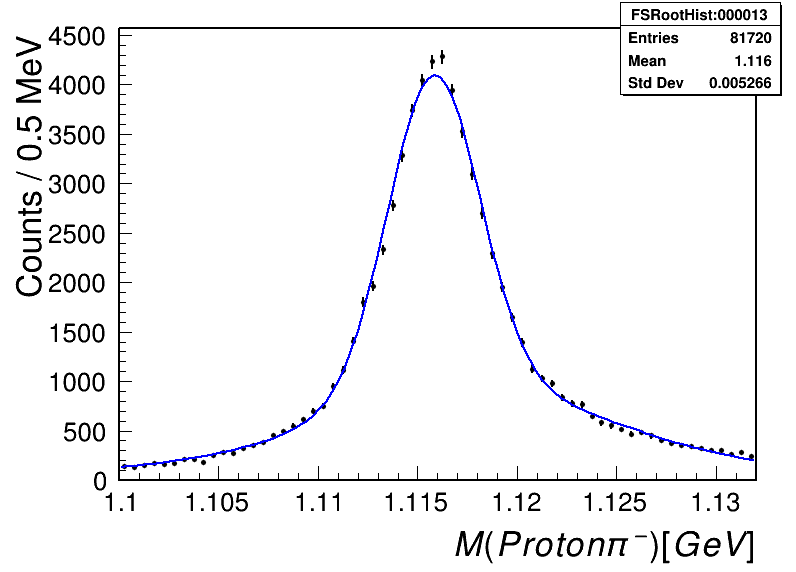

    CREATING HISTOGRAM... FSRootHist:000013   OKAY           (entries = 81720)


Info in <TCanvas::Print>: pdf file plotsMC/MCLambda_m_sb_gaussNdbl_TEST.pdf has been created
Info in <TCanvas::Print>: png file plotsMC/MCLambda_m_sb_gaussNdbl_TEST.png has been created


In [16]:
from IPython.display import Image, display
latex = ROOT.TLatex()

# ROOT.FSHistogram.clearHistogramCache("histosMC_pipkslamb")

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'M(Proton \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# cutsLAMB = "chi2DOF,unusedE,unusedTracks,coherentPeak,tRange,constrainLambda"

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats (gluex_style hides this off by default)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    gaussNdbl = ROOT.TF1("gaussNdbl","((gausn(0) + gausn(3) + [6] + [7]*x) / 0.0005)",1.1,1.132)
    gaussNdbl.SetLineColor(ROOT.kBlue)
    gaussNdbl.SetLineWidth(2)
    gaussNdbl.SetLineStyle(1)
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())
    gaussNdbl.SetParName(0, "gaus1_amplitude")
    gaussNdbl.SetParName(1, "gaus1_mean")
    gaussNdbl.SetParName(2, "gaus1_sigma_detectorResolution")
    gaussNdbl.SetParName(3, "GAUS2_AMPLITUDE")
    gaussNdbl.SetParName(4, "GAUS2_MEAN")
    gaussNdbl.SetParName(5, "GAUS2_SIGMA_detectorResolution")
    gaussNdbl.SetParName(6, "Linear_offset")
    gaussNdbl.SetParName(7, "Linear_factor")
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())

    gaussNdbl.SetParameter("gaus1_amplitude", 0.00225)
    # gaussNdbl.SetParameter("gaus1_amplitude", 0.0317)
    gaussNdbl.SetParameter("gaus1_mean", 1.116)
    gaussNdbl.SetParameter("gaus1_sigma_detectorResolution", 0.00251)
    # gaussNdbl.SetParameter("gaus1_sigma_detectorResolution", 0.00522)
    # gaussNdbl.FixParameter(0, 00.003)
    # gaussNdbl.FixParameter(1, 1.115683)
    # gaussNdbl.FixParameter(2, 0.00005)

    gaussNdbl.SetParameter("GAUS2_AMPLITUDE", 0.00502)
    gaussNdbl.SetParameter("GAUS2_MEAN", 1.116)
    gaussNdbl.SetParameter("GAUS2_SIGMA_detectorResolution", 0.00280)
    # gaussNdbl.FixParameter(3, 0.00025)
    # gaussNdbl.FixParameter(4, 1.11746)
    # gaussNdbl.FixParameter(5, 0.00159)

    # gaussNdbl.SetParameter("Linear_offset", 0.04077)
    gaussNdbl.SetParameter("Linear_factor", 0.03977)
    gaussNdbl.FixParameter(6, 0.04077)
    # gaussNdbl.FixParameter(7, 0.00)

    histMC_lamb = ROOT.FSHistogram.getTH1F(fileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(flightSigLambda)")
    histMC_lamb.SetStats(True)
    histMC_lamb.SetLineColor(ROOT.kBlack)
    # histMC_lamb.SetLineStyle(1)
    # histMC_lamb.SetLineWidth(2)
    histMC_lamb.SetMarkerStyle(20)
    histMC_lamb.SetMarkerSize(0.6)
    histMC_lamb.GetXaxis().SetTitle(axisLabel)
    histMC_lamb.GetYaxis().SetTitle("Counts / 0.5 MeV")
    histMC_lamb.Draw("")
    # histMC_lamb.Fit(gaussNdbl, "RSQ")
    fit_result = histMC_lamb.Fit(gaussNdbl, "RSQ")
    print("Fit valid:", fit_result.IsValid())
    print("Fit status code:", fit_result.Status())
    print("Covariance matrix status:", fit_result.CovMatrixStatus())
    print("Chi2:", fit_result.Chi2())
    print("NDF:", fit_result.Ndf())
    print("Chi2/NDF:", fit_result.Chi2() / fit_result.Ndf() if fit_result.Ndf() else float('inf'))
    gaussNdbl.Draw("same")

    # hTHROWN.

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(histMC_lamb, ' KinFit Data', 'lP')
    legend1.AddEntry(histMC_lamb, ' accidentals subtracted', "")
    legend1.AddEntry(gaussNdbl, ' gaussNdbl fit', 'l')
    # legend1.Draw("same hist")

    print("Minimum bin content in histogram:", histMC_lamb.GetMinimum())

    print(f"{'Index':<5} {'Name':<30} {'Value':>10} {'Error':>10}")
    print("-" * 60)
    for i in range(gaussNdbl.GetNpar()):
        name = gaussNdbl.GetParName(i)
        val = gaussNdbl.GetParameter(i)
        err = gaussNdbl.GetParError(i)
        print(f"{i:<5} {name:<30} {val:>10.5f} {err:>10.5f}")

    img_path = 'plotsMC/MCLambda_m_sb_gaussNdbl_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

# 2D plots MC

### Dalitz: KSpip vs Lambpip

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(K_{s} \pi^{+})^{2}'
XaxisLabel = 'M(\Lambda \pi^{+})^{2}'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(80, 1.6, 2.6, 80, 0.6, 5.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(XaxisLabel + ' [GeV^{2}]')
    h1.GetYaxis().SetTitle(YaxisLabel + ' [GeV^{2}]')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle, 'l')
    # legend1.Draw('same')

    img_path = 'plotsMC/KsPipVSLambPip_m2'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### 2D mass: Lambda vs. K*

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(Proton \pi^{-})'
XaxisLabel = 'M(KShort \pi^{+})'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # clear histogram memory before printing the next one
    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({Proton},{PiMinus2}):MASS({DecayingKShort},{PiPlus1})", "(80, 0.42, 4.5, 80, 1.2, 1.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(XaxisLabel + ' [GeV^{2}]')
    h1.GetYaxis().SetTitle(YaxisLabel + ' [GeV^{2}]')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle, 'l')
    # legend1.Draw('same')

    img_path = 'plotsMC/Lamb_VS_KsPip_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Beam Energy

In [ ]:
from IPython.display import Image, display

plotTitle = 'Beam energy'
plot2Title = 'Beam energy measured'
axisLabel = 'Beam energy [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e", "(80, 0.0, 14.0)", "")
h1.SetStats(False)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle(axisLabel)
h1.GetYaxis().SetTitle('Events')
h1.Draw()

h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e_measured", "(80, 0.0, 14.0)", "")
h2.SetStats(False)
h2.SetMarkerStyle(24)
h2.SetMarkerColor(ROOT.kRed)
h2.GetXaxis().SetTitle(axisLabel)
h2.GetYaxis().SetTitle('Events')
h2.Draw('p same')
    
legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
# legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
# legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
legend1.Draw('same')

img_path = 'plotsMC/beam_e.png'
canvas.SaveAs(img_path)
canvas.Close()
display(Image(filename=img_path))

### Target proton

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = 'Target proton mass'
axisLabel = 'Mass (target proton) [GeV/c^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({?????})", "(80, 0.0, 4.0)", "")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plotsMC/target_m_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort Pi Plus Lamb

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Mass (K_{s} \pi^{+} #Lambda)'
axisLabel = 'Mass (K_{s} \pi^{+} p \pi^{-})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")

    # FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
    # h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")
    
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plotsMC/KsPipLamb_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()